Reality Mining Dataset: http://realitycommons.media.mit.edu/RealityMining.zip
<br>
Newsgroups Dataset: http://qwone.com/~jason/20Newsgroups/
<br>


In [1]:
from scipy.io import loadmat
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
mat = loadmat('/Users/tradergllc/rsi/datasets/raw/RealityMining/realitymining.mat')

In [3]:
type(mat)

dict

In [4]:
mat.keys()

['network', 's', '__version__', '__header__', '__globals__']

In [12]:
mat['s'][0, 0][0]

array([], shape=(0, 0), dtype=uint8)

In [13]:
subjects = mat['s'][0]

In [22]:
subjects[0]['apps'][0]

array([], dtype=float64)

In [58]:
adj = mat['network'][0, 0][0]

In [62]:
adj[adj != 1] = 0
print adj

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
G = nx.from_numpy_matrix(mat['network'][0, 0][0])

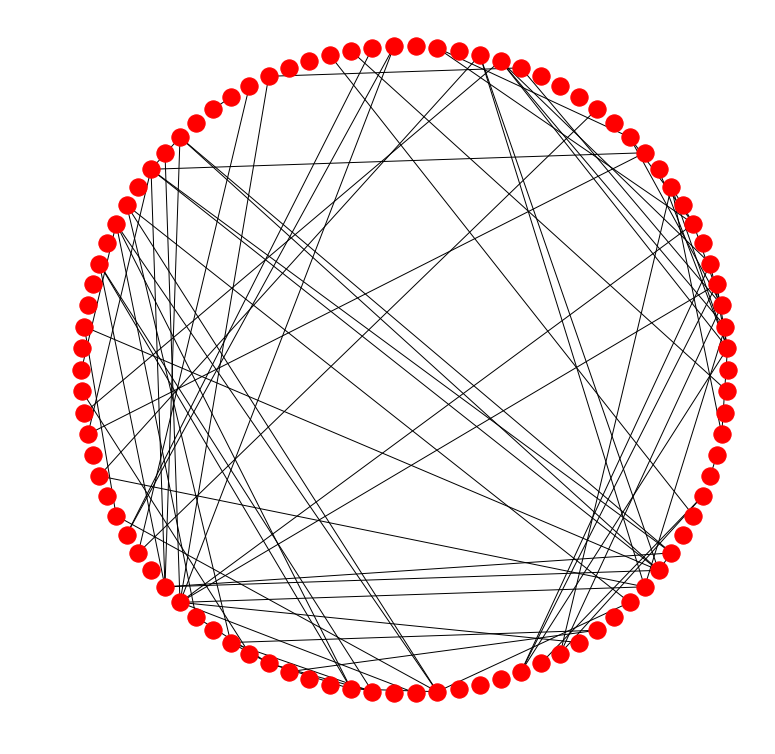

In [76]:
plt.figure(figsize=(10,10))
nx.draw_circular(G)

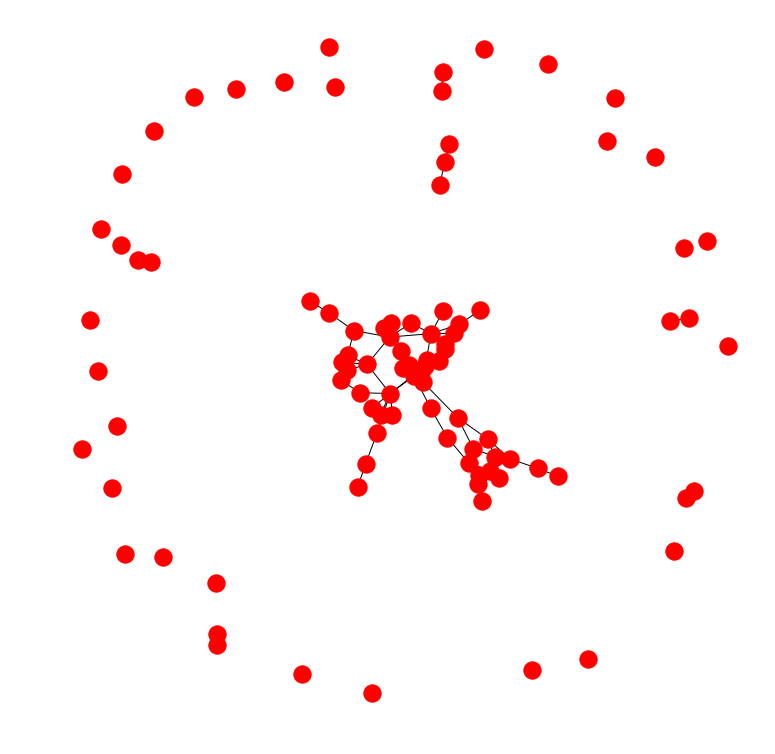

In [75]:
plt.figure(figsize=(10,10))
nx.draw(G)

In [71]:
nx.degree_histogram(G)

[25, 19, 20, 9, 9, 5, 4, 1, 2]

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Apps By Week
test = pd.read_csv('/Users/tradergllc/rsi/datasets/py/reality-mining/allPairs-appsByWeek/data1.csv', 
                 sep=',', engine='python', dtype=str)

In [3]:
# Apps By Week
df = pd.read_csv('/Users/tradergllc/rsi/datasets/proc/reality-mining/txt/interim/appsByWeek-clean.txt', 
                 sep=', ', header=None, engine='python', dtype=str, names=['id', 'date', 'app', 'freq'])

In [28]:
target = list(df['app'].unique())
print target

['ScreenSaver', 'context_log', 'BtUi', 'Logs', 'Pinboard', 'mixpix', 'Phone', 'Phonebook', 'Camera', 'Menu', 'SysAp', 'profileapp', 'Browser', 'FExplorer', 'FaxModemUi', 'gs', 'Appmngr', 'Videorecorder', 'VCommand', 'mce', 'NpdViewer', 'Voicerecorder', 'Switcher', 'MediaGallery', 'Calendar', 'mmcapp', 'FileManager', 'contextbook', 'www', 'ClockApp', 'JavaAware', 'PSLN', 'MediaPlayer', 'Appinst', 'ConnectionMonitorUi', 'Cam', 'cshelp', 'ToDo', 'Notepad', 'KPCaMain', 'ImageViewer', 'Speeddial', 'Pop2', 'MupeClient', 'SmsEditor', 'CbsUiApp', 'Ussd', 'Pang', 'ChessBuddy', 'Emonic', 'ChessMaster', 'SpeedDevils', 'RainbowSix3', 'DRIV3R', 'Fisherman', 'exbubble', 'AgileMessenger', 'Sos', 'Satui', 'MGS', 'CasinoWar', 'ZooBattle', 'RocketGirl', 'mStopwatch', 'BrutalFightingMIDlet', 'CaribbeanPoker', 'BaywatchBeachVolleyball', 'ZombieMansion', 'MobileSense', 'SnakeEx', 'CtrlFreak', 'RSPrint', 'Calcsoft', 'NSmlDSSync', 'BlueAware', 'converter', 'Clicker', 'WorldMate', 'Vm', 'About', 'PuTTY', 'Aut

In [29]:
example = list(np.array(test.columns)[1:])
print example

['2004RealFootball', '40791', 'AKNEXLIST', 'AKNEXNOTE', 'AKNEXPOPFIELD', 'AKNEXSPANE', 'About', 'AgileMessenger', 'Ambistax', 'AncientEmpires', 'AnsPhone', 'Appinst', 'Appmngr', 'AstroShock', 'Autolock', 'BBMIDlet', 'BTBrowser', 'BTObjComm', 'BabyToy', 'BasicPush', 'BasicPushMIDlet', 'Bay', 'BaywatchBeachVolleyball', 'BlackJack', 'BlockBreakerDeluxe', 'BlueAware', 'BombJack', 'Bounce', 'Browser', 'BrutalFightingMIDlet', 'BtUi', 'BubbleTrouble', 'CNN', 'CNNInst', 'CNNlive', 'Calcsoft', 'Calendar', 'CallRecorder', 'Cam', 'Camera', 'CaribbeanPoker', 'CasinoWar', 'CavemanX-masEdition', 'CbsUiApp', 'Cell', 'ChessBuddy', 'ChessMaster', 'Chesspuzzle', 'Clicker', 'Clix', 'ClockApp', 'Colors', 'ConnectionMonitorUi', 'ConverterII', "Crash'N'Burn", 'CrazyPimples', 'CtrlFreak', 'DRIV3R', 'DataMover', 'DesktopMessage', 'DrBok', 'Drakengard', 'Dribble', 'DynamicList', 'Eden', 'Editor', 'Emonic', 'Example3', 'FExplorer', 'FTcom', 'FatalForce', 'FaxModemUi', 'FerrariMonteCarlo', 'Fifa2004', 'FileMan',

In [32]:
example[30]

'BtUi'

In [25]:
mapping = []
for app in target:
    mapping.append(example.index(app))

In [26]:
mapping

[138,
 182,
 30,
 95,
 120,
 196,
 115,
 118,
 39,
 99,
 154,
 200,
 28,
 68,
 71,
 190,
 12,
 165,
 163,
 195,
 108,
 167,
 153,
 97,
 36,
 197,
 75,
 183,
 205,
 50,
 89,
 113,
 98,
 11,
 52,
 38,
 185,
 159,
 107,
 90,
 87,
 151,
 123,
 104,
 142,
 43,
 162,
 114,
 45,
 66,
 46,
 150,
 132,
 57,
 77,
 186,
 7,
 146,
 137,
 96,
 41,
 174,
 136,
 193,
 29,
 40,
 22,
 173,
 101,
 145,
 56,
 131,
 35,
 106,
 25,
 184,
 48,
 171,
 166,
 6,
 126,
 14,
 73,
 160,
 110,
 102,
 203,
 88,
 21,
 175,
 49,
 105,
 60,
 70,
 31,
 64,
 181,
 72,
 13,
 42,
 24,
 55,
 128,
 8,
 61,
 0,
 26,
 54,
 9,
 62,
 140,
 155,
 100,
 168,
 33,
 34,
 141,
 116,
 180,
 198,
 1,
 156,
 69,
 178,
 130,
 157,
 172,
 93,
 127,
 129,
 44,
 135,
 109,
 59,
 32,
 85,
 161,
 83,
 192,
 16,
 20,
 19,
 133,
 80,
 194,
 58,
 81,
 191,
 67,
 76,
 139,
 94,
 169,
 149,
 17,
 4,
 5,
 84,
 147,
 177,
 3,
 2,
 91,
 63,
 176,
 204,
 179,
 148,
 170,
 144,
 86,
 125,
 51,
 158,
 202,
 103,
 37,
 187,
 10,
 119,
 117,
 82,
 199,
 

In [22]:
test_adj = np.array(test)[:,1:].astype(int)

In [23]:
test_adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
test_adj_aligned = test_adj.copy()
test_adj_aligned

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
for i in range(len(mapping)):
    test_adj_aligned[:, i] = test_adj[:, mapping[i]]
print test_adj_aligned

[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]]
